In [1]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

#회귀모델
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#분류모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [58]:
#데이터불러오기
df = pd.read_csv("../05/05_iris.csv", encoding="cp949")
df.head

<bound method NDFrame.head of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [5]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [65]:
#feature와 target을 먼저 잡아야함(미리 나눠놓아야함)
feature = df.loc[:, 'Sepal.Width':'Petal.Width']
feature

,Sepal.Width,Petal.Length,Petal.Width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [66]:
target = df.loc[:, 'Sepal.Length']
target

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [43]:
#상관계수
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


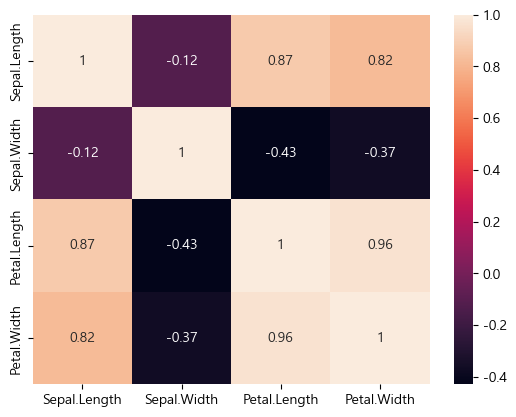

In [44]:
#상관계수 차트
sns.heatmap(df.corr(), annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

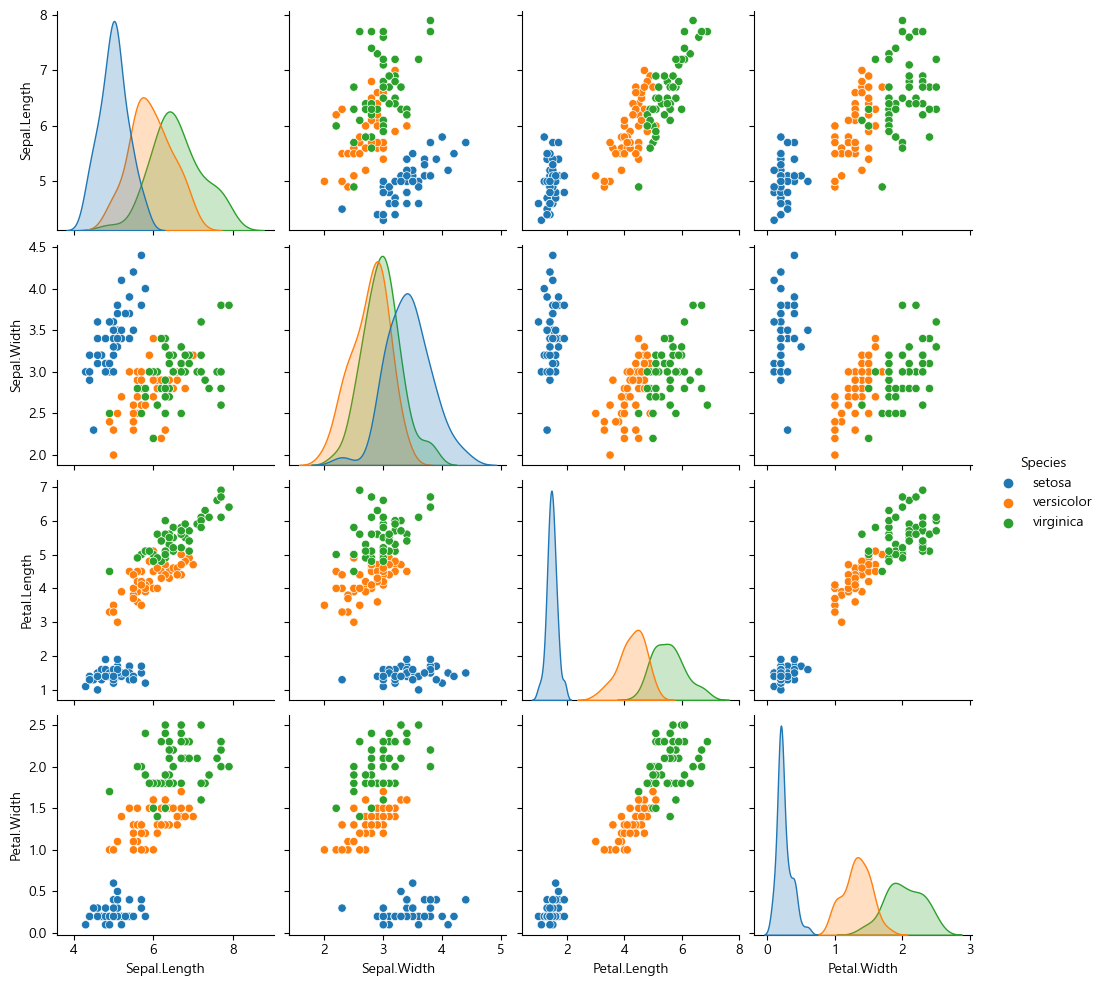

In [46]:
#상관계수 차트
sns.pairplot(df, hue='Species')
plt.show

In [69]:
#학습데이터와 테스트데이터 분리
#train_test_split함수가 알아서 x_train, x_test(피져)과 y_train, y_text(타겟)를 구별해줌
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=42)
#https://lsjsj92.tistory.com/545 -> x_train, x_test, y_train, y_test 4가지로 나누어지는 이유

In [71]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 112 entries, 4 to 102
Series name: Sepal.Length
Non-Null Count  Dtype  
--------------  -----  
112 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [42]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 112 entries, 4 to 102
Series name: Sepal.Length
Non-Null Count  Dtype  
--------------  -----  
112 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4 to 102
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Width   112 non-null    float64
 1   Petal.Length  112 non-null    float64
 2   Petal.Width   112 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [74]:
#모델 생성하고 학습
model = LinearRegression()
model.fit(x_train, y_train) #학습
model

LinearRegression()

In [75]:
#예측하기
pred = model.predict(x_test)

In [76]:
#평가하기
RMSE = np.sqrt(np.mean((y_test - pred)**2))
RMSE

0.31748600958006823

In [77]:

np.sqrt(mean_squared_error(y_test, pred))

0.31748600958006823

In [78]:
y_test

73     6.1
18     5.7
118    7.7
78     6.0
76     6.8
31     5.4
64     5.6
141    6.9
68     6.2
82     5.8
110    6.5
12     4.8
36     5.5
9      4.9
19     5.1
56     6.3
104    6.5
69     5.6
55     5.7
132    6.4
29     4.7
127    6.1
26     5.0
128    6.4
131    7.9
145    6.7
108    6.7
143    6.8
45     4.8
30     4.8
22     4.6
15     5.7
65     6.7
11     4.8
42     4.4
146    6.3
51     6.4
27     5.2
Name: Sepal.Length, dtype: float64

In [79]:
pred

array([6.3557344 , 5.36663102, 7.13193654, 6.06541754, 6.29435951,
       4.88320311, 5.52278826, 6.10291362, 5.6034365 , 5.68573294,
       6.37422402, 4.74902653, 4.93507476, 4.89052435, 5.21562998,
       6.41197004, 6.63385768, 5.62217606, 6.13629565, 6.35086205,
       4.96358445, 6.2281038 , 4.95870363, 6.41929976, 7.75171453,
       6.11241685, 6.57762203, 6.77291507, 4.61215113, 4.89758716,
       4.77457049, 5.54317602, 6.1903493 , 5.09557904, 4.73708289,
       5.90518017, 6.26340941, 5.08607581])

In [80]:
lm = pd.DataFrame()
lm['test'] = y_test
lm['pred'] = pred

<function matplotlib.pyplot.show(close=None, block=None)>

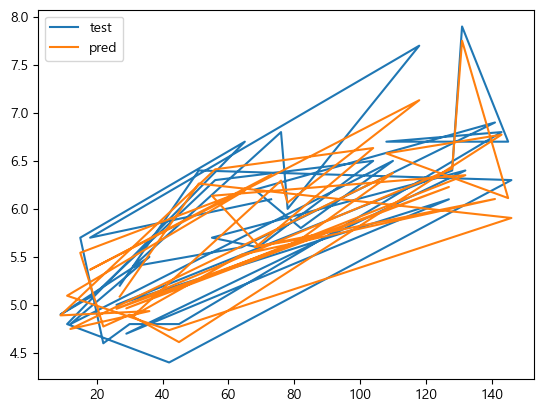

In [81]:
lm.plot()
plt.show

In [47]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [82]:
#분류모델
#target encoding
feature = df.loc[:,'Sepal.Length':'Petal.Width']
target = df.loc[:,'Species']

In [83]:
#target encoding



In [85]:
#학습데이터와 테스트데이터 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=42)

In [86]:
#학습 
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
#예측
pred = model.predict(x_test)
pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype=object)

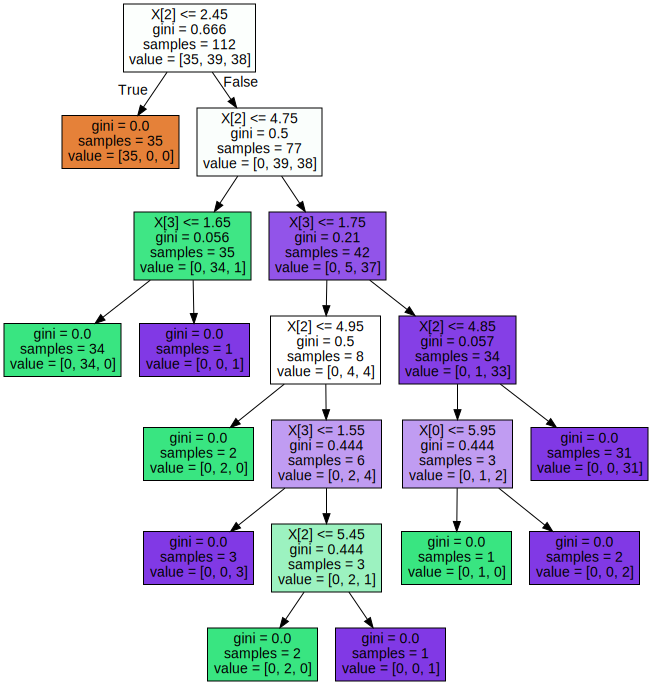

In [57]:
#DecisionTree 시각적 표현
#conda install python-graphviz : 아나콘다 프롬프트 실행해서 입력해야함

from sklearn.tree import export_graphviz
import graphviz

# .dot 파일로 export  
export_graphviz(model, out_file='tree.dot', impurity=True, filled=True)

# 생성된 tree.dot 파일을 읽어서 시각화
with open('tree.dot') as fp:
  dot_graph = fp.read()

graphviz.Source(dot_graph)

In [88]:
#예측
accuracy_score(y_test, pred)

1.0

In [27]:
#평가
 

0.9736842105263158